<a href="https://colab.research.google.com/github/albope/master-data-analytics-content/blob/master/EDEM_Sentiment_Analysis_Yelp!_(Practica_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Sentiment Analysis yelp!

Imports

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow_datasets as tfds
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

Importing the data from tensorflow datasets

In [3]:
dataset, info = tfds.load('yelp_polarity_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_examples, test_examples = dataset['train'], dataset['test']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/yelp_polarity_reviews/subwords8k/0.1.0.incompleteC71X35/yelp_polarity_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/yelp_polarity_reviews/subwords8k/0.1.0.incompleteC71X35/yelp_polarity_reviews-test.tfrecord


Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


As the NN only understand numbers we need a encoder to convert this words to numbers.

In [0]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8176


In [6]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [6263, 198, 1489, 1353, 559, 6598, 8039, 7966]
The original string: "Hello TensorFlow."


In [0]:
assert original_string == sample_string

In [8]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

6263 ----> Hell
198 ----> o 
1489 ----> Te
1353 ----> ns
559 ----> or
6598 ----> Flo
8039 ----> w
7966 ----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = (train_examples
                 .shuffle(BUFFER_SIZE)
                 .padded_batch(BATCH_SIZE, padded_shapes=([None],[])))

test_dataset = (test_examples
                .padded_batch(BATCH_SIZE,  padded_shapes=([None],[])))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=2,
                    steps_per_epoch=300,
                    validation_data=test_dataset, 
                    validation_steps=30)

Train for 300 steps, validate for 30 steps
Epoch 1/2
300/300 [==============================] - 35s 116ms/step - loss: 0.6293 - accuracy: 0.5937 - val_loss: 0.3963 - val_accuracy: 0.8146
Epoch 2/2
300/300 [==============================] - 27s 91ms/step - loss: 0.3433 - accuracy: 0.8522 - val_loss: 0.2773 - val_accuracy: 0.8833


In [14]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    594/Unknown - 22s 36ms/step - loss: 0.2915 - accuracy: 0.8718Test Loss: 0.2914823426893263
Test Accuracy: 0.8717894554138184


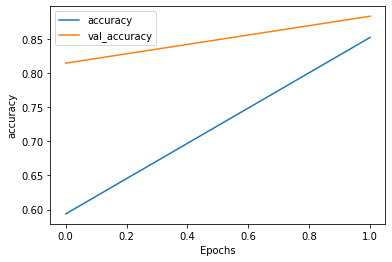

In [15]:
plot_graphs(history, 'accuracy')

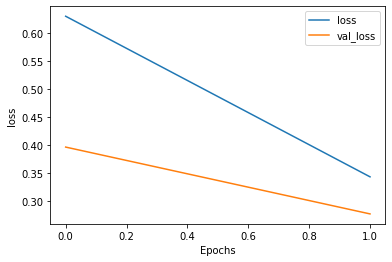

In [16]:
plot_graphs(history, 'loss')

In [0]:
def sample_predict(sample_pred_text):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  return (predictions)

In [18]:
# predict on a sample text

sample_pred_text = ('The restaurant was the best ever... I went yesterday and the meat was well cooked, so I oredered more')
predictions = sample_predict(sample_pred_text)
print(predictions)

[[-0.05486671]]


In [19]:
for x, y in test_dataset.take(5):
  result=""
  for index in x[0]:
    if index == 0:
      break
    result += encoder.decode([index])
  predictions = sample_predict(result)
  print(result)
  print("Prediction", predictions)
  tf.print("label", y[0])

Was not impressed, and will not return.
Prediction [[-0.49637222]]
label 0
Pure madness...at 2 pm on a Thursday? Accessible parking was full. There was only one motorized cart. It took me five minutes just to motor into the store, no thanks to the hordes departing who could not see my flag, cart, or colorfully clad body. \n\nBefore coming to the store, I called to get the membership price, and was told there is a $25 option. Um, nope. Try $55...can you say bait and switch?\n\nLong, long lines to check out, just like the day before Thanksgiving or the zombie invasion. \n\nI ran screaming, straight to Sam's Club, where the shoppers are polite and the aisles are well labeled. Costco may have fancy meat and a service deli...but I'm not going to fight for my food and jumbo bottles of Tide. \n\nNever again!
Prediction [[-2.7930896]]
label 0
Came here once and it was awesome!\n\nSecond time came here..also after clubbing hehehe....was about 2am. Asked for steak and eggs, medium rare. It came 

I was so very disappointed!!!  This is not even close to the Al's Beef on Taylor street.  The beef tastes old and the fries are limp and soggy.  The decor is nice but no counter space to put your tray while you get ketchup.  Not that I will ever be coming back!
Prediction [[-1.9280374]]
label 0


This place is absolutely fabulous, for many reasons.  \n\nFirst and foremost, the food.  I ordered two large pizzas to go (cheese and vegetarian).  Both were absolutely delicious!  The crust is thin and light, the cheese melts in your mouth, the sauce ultra flavorful, and the veggies were fresh and cooked to perfection.  It was a definite hit with everyone.\n\nThe location is a bit hidden (it's in an industrial neighborhood), but still very convenient as it is right across the street from Tempe Marketplace.  The interior was charming, with brick walls and small tables - reminescint of what I envision a small pizza parlor in Italy to look and feel like.\n\nAlthough the prices are higher than you would find at a Dominos or Pizza Hut, so is the quality of the food - therefore, worth the extra few bucks.\n\nFinally, the staff was amazing.  I had approached the manager for a small food donation for a local charity, and he went above and beyond to provide us with ample food for all involved 

# Exercises
1. Create a new colab Notebook
2. Create a IMDB movies reviews Sentiment classifier
3. Stack 2 Bidirectional layers in the model
4. Add a dropout layer between the 2 Dense layers.
5. Plot the results accuracy and loss curve
6. Show the results of 10 predictions
7. (Optional) Train the model with full words instead of subwords


## Practical tips

Download the data using: 

```
dataset name: 'imdb_reviews/subwords8k'
```

To stack 2 Bidirectional you need to use : return_sequences=True only in the first Bidirectional layer
```
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True))

```
To use dropout you can add the line:
```
tf.keras.layers.Dropout(0.5)
```




